# 210424 Fix Component 5

In [1]:
const COMPONENT = 5;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-14210883012793496189\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16779807206770144203\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-14210883012793496189\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,906,1405,Bacillus mycoides,species,350,1,NaN,1,12,3,0.952147,7,1,mycoides
2,914,1428,Bacillus thuringiensis,species,350,1,NaN,1,19,4,0.683279,1,2,thuringiensis
3,1908,missing,Bacillus cereus subgroup 1,missing,899,0,NaN,0,80,5,0.739589,1,1,cereus subgroup 1
4,1909,missing,Bacillus cereus subgroup 2,missing,899,0,NaN,0,71,6,0.691876,1,2,cereus subgroup 2
5,1910,missing,Bacillus cereus subgroup 3,missing,899,0,NaN,0,16,7,0.785307,1,1,cereus subgroup 3
6,746,574375,Bacillus gaemokensis,species,350,1,NaN,1,2,1,0.0109502,0,1,gaemokensis
7,897,1392,Bacillus anthracis,species,350,1,NaN,1,99,2,0.112911,0,2,anthracis
8,1911,missing,Bacillus cereus subgroup 4,missing,899,0,NaN,0,18,8,0.363272,0,1,cereus subgroup 4


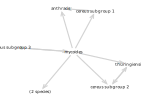

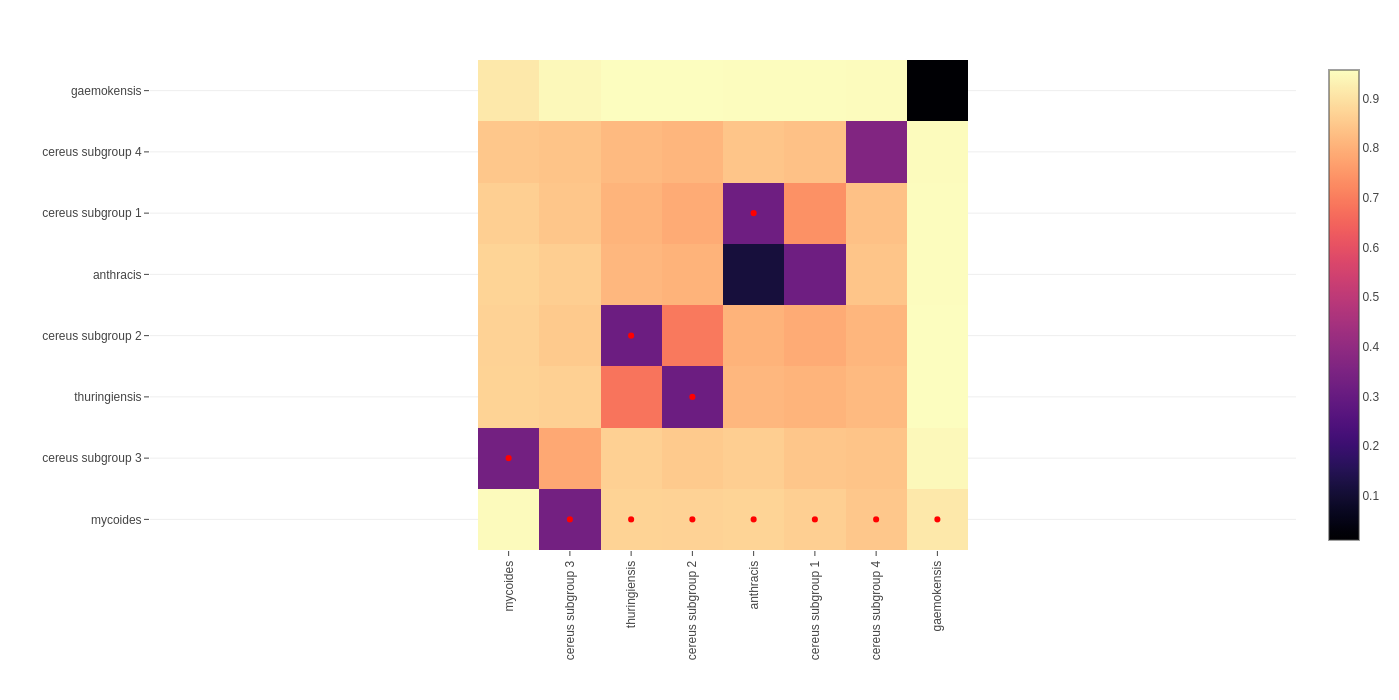

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

In [4]:
trees["all"] = cluster_annotate(cdata, 1:cdata.ntaxa)

ClusterAnalysis.TreeAnnotations with node attributes [:id, :strong_cluster, :genome_idx, :class_label]

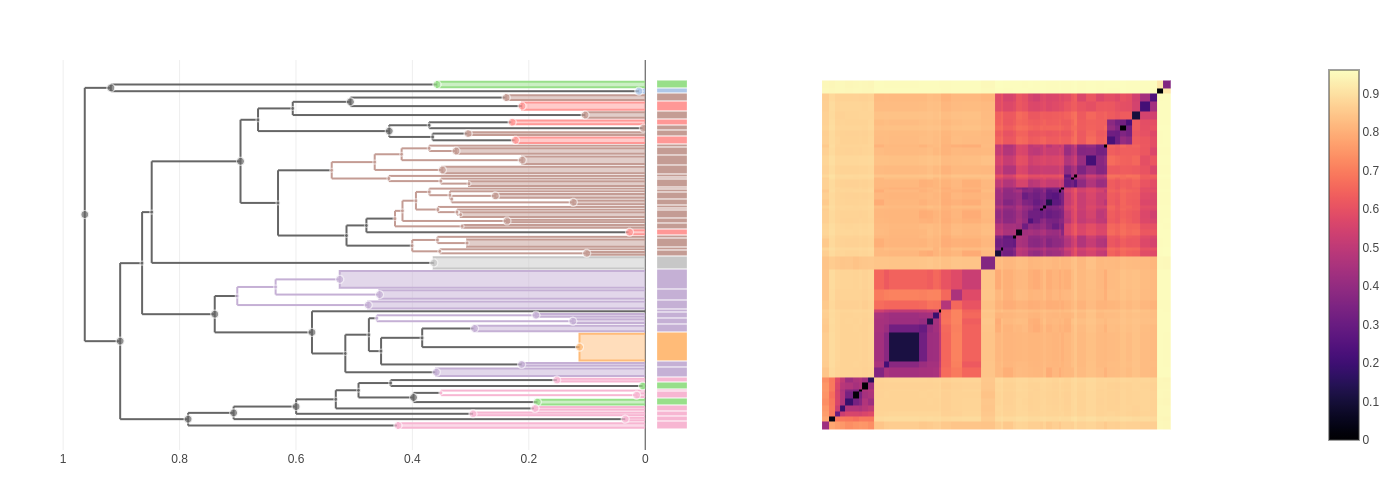

In [5]:
plot(multi_clustermap(cdata, trees["all"]))

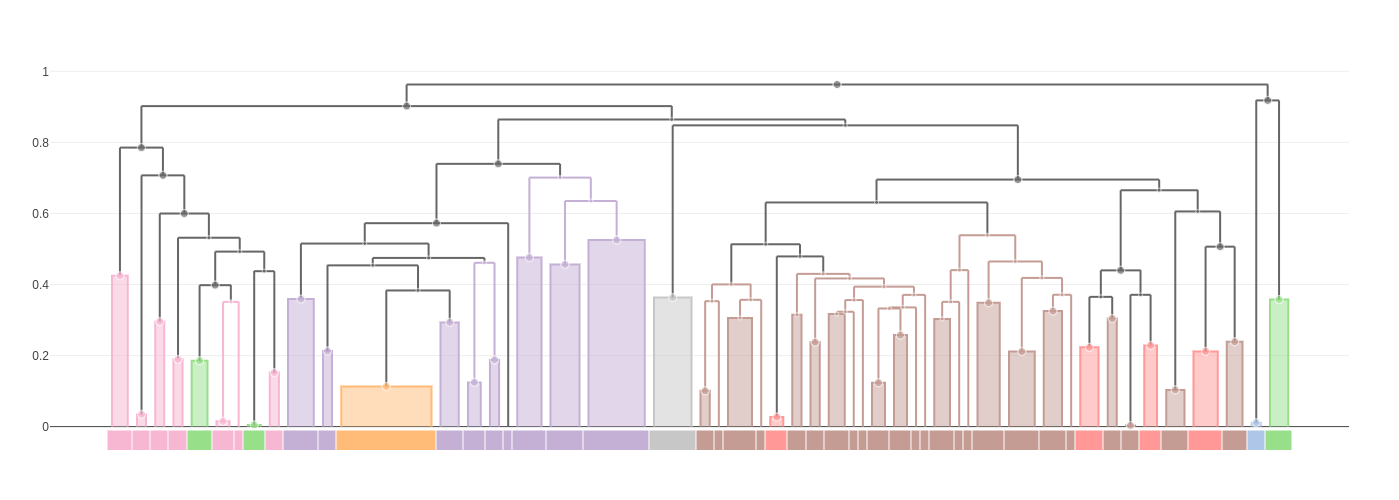

In [6]:
plot(dendrogram(cdata, trees["all"]))

## Initial edits

### Cereus 3 / mycoides

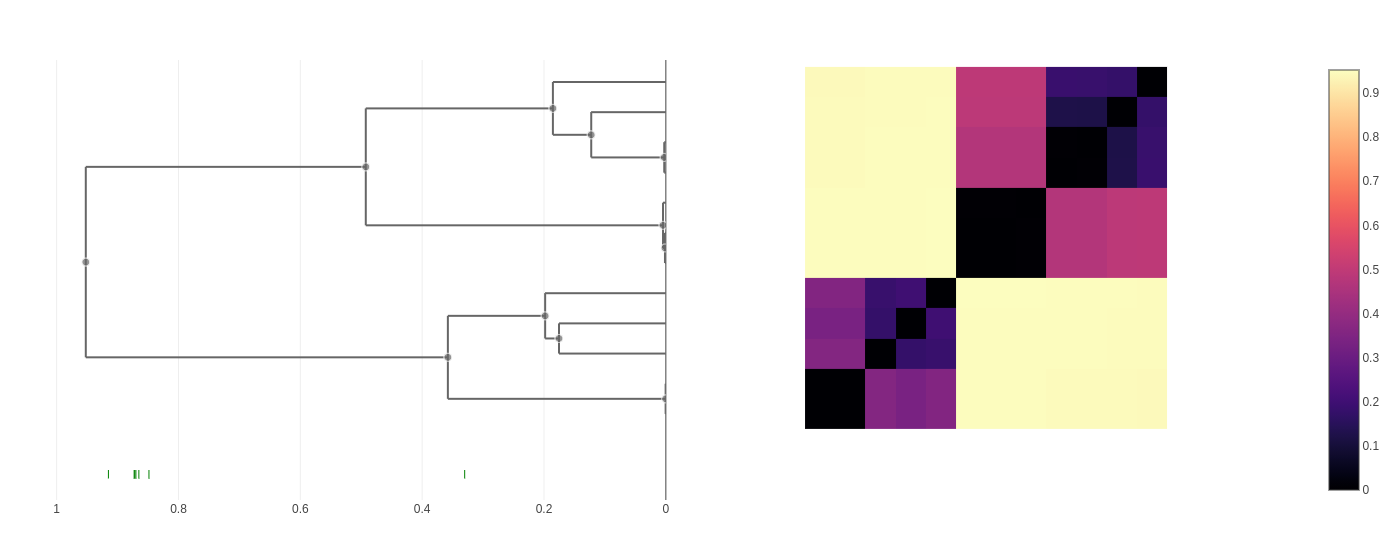

In [8]:
let taxon = "mycoides"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

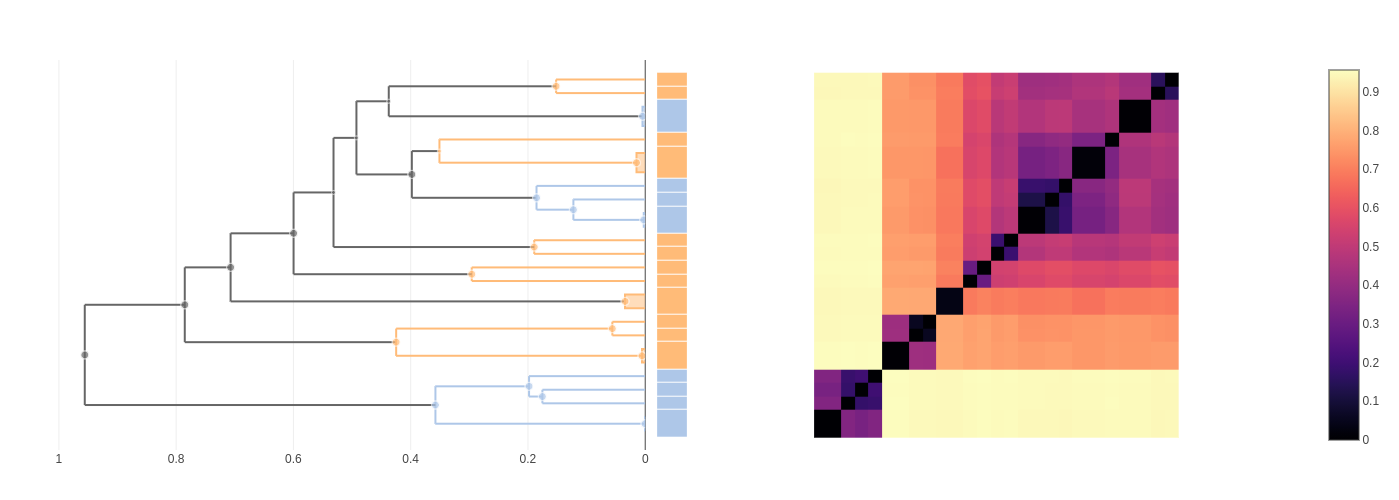

In [9]:
trees["mycoides/cereus subgroup 3"] = cluster_annotate(cdata, ["mycoides", "cereus subgroup 3"])
plot(multi_clustermap(cdata, trees["mycoides/cereus subgroup 3"]))

Keep only the well-separated mycoides subcluster (David's suggestion)

In [10]:
remove_subtrees!(edits, trees["mycoides/cereus subgroup 3"], [33, 41])

#3 mycoides:
	7/12 removed
	Diameter 0.9521 => 0.3578


### Cereus 1 / antrhacis

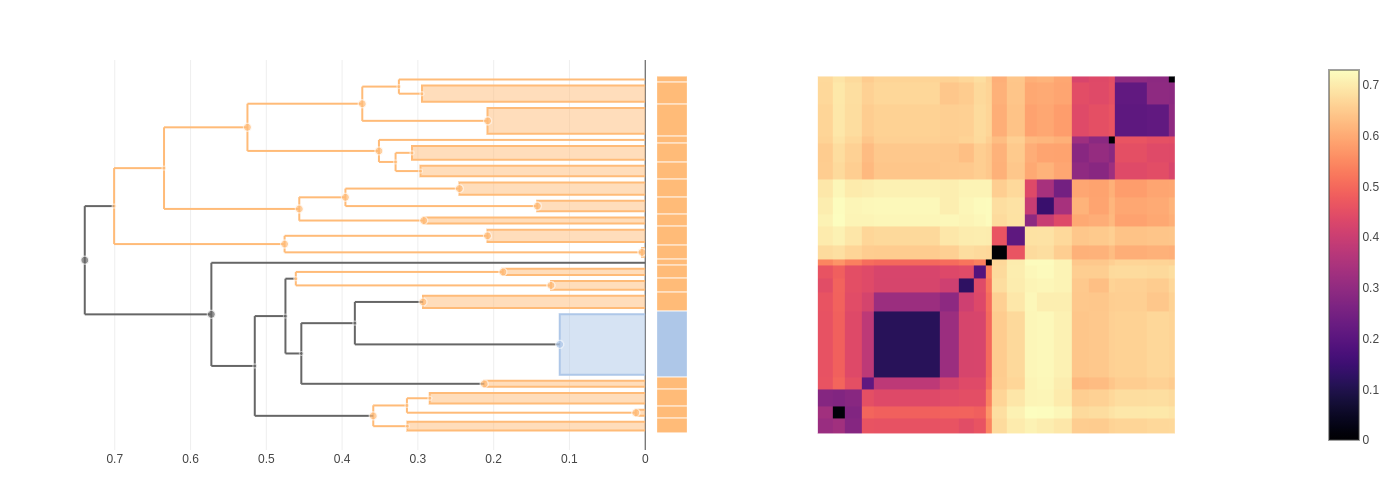

In [11]:
trees["mycoides/cereus subgroup 3"] = cluster_annotate(cdata, ["anthracis", "cereus subgroup 1"])
plot(multi_clustermap(cdata, trees["mycoides/cereus subgroup 3"]))

Remove all cereus from the bottom cluster:

In [12]:
keep_subtrees!(edits, trees["mycoides/cereus subgroup 3"], [356, 312])

#5 cereus subgroup 1:
	22/80 removed
	Diameter 0.7396 => 0.7009


### Cereus 2 / thuringiensis

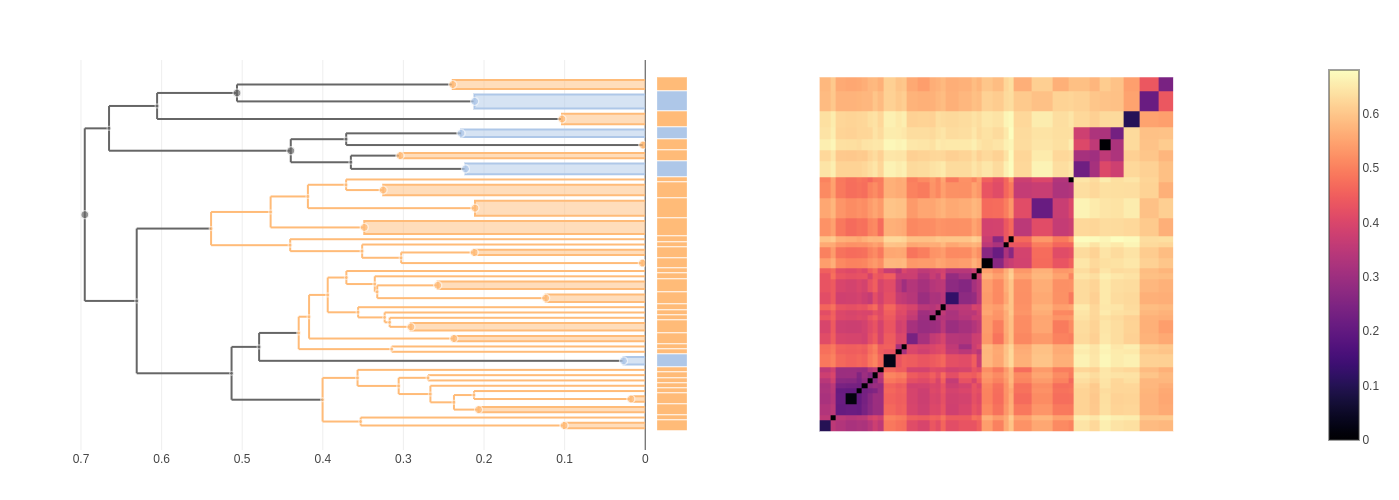

In [13]:
trees["thuringiensis/cereus subgroup 2"] = cluster_annotate(cdata, ["thuringiensis", "cereus subgroup 2"])
plot(multi_clustermap(cdata, trees["thuringiensis/cereus subgroup 2"]))

Make top cluster pure thuringiensis, bottom cluster pure cereus.

In [14]:
remove_subtrees!(edits, trees["thuringiensis/cereus subgroup 2"], [108, 137, 119, 95, 145])

#4 thuringiensis:
	3/19 removed
	Diameter 0.6833 => 0.6652
#6 cereus subgroup 2:
	13/71 removed
	Diameter 0.6919 => 0.6256


## Touch up

In [15]:
check_edit_progress(edits)

#4 thuringiensis
	=> #6 cereus subgroup 2
#5 cereus subgroup 1
	=> #2 anthracis
#6 cereus subgroup 2
	=> #4 thuringiensis


### thuringiensis

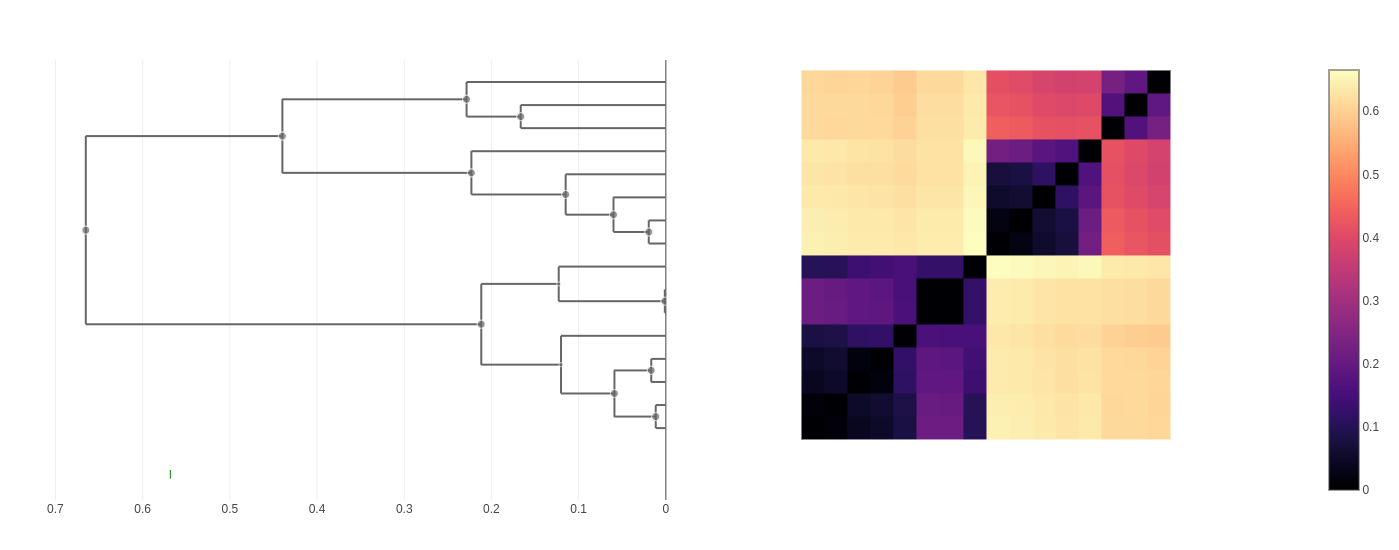

In [20]:
plot(clustermap(apply_edits(edits), "thuringiensis"))

In [22]:
set_threshold!(edits, "thuringiensis", .5)

0.5

### cereus subgroup 1

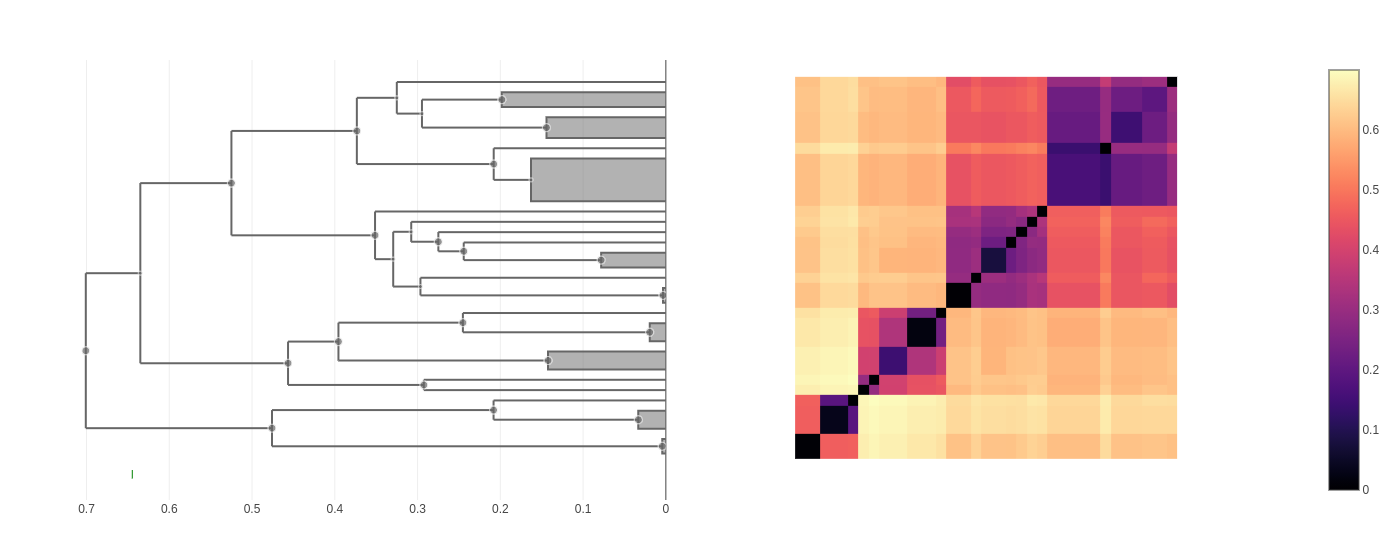

In [23]:
plot(clustermap(apply_edits(edits), "cereus subgroup 1"))

In [24]:
set_threshold!(edits, "cereus subgroup 1", .6)

0.6

### cereus subgroup 2

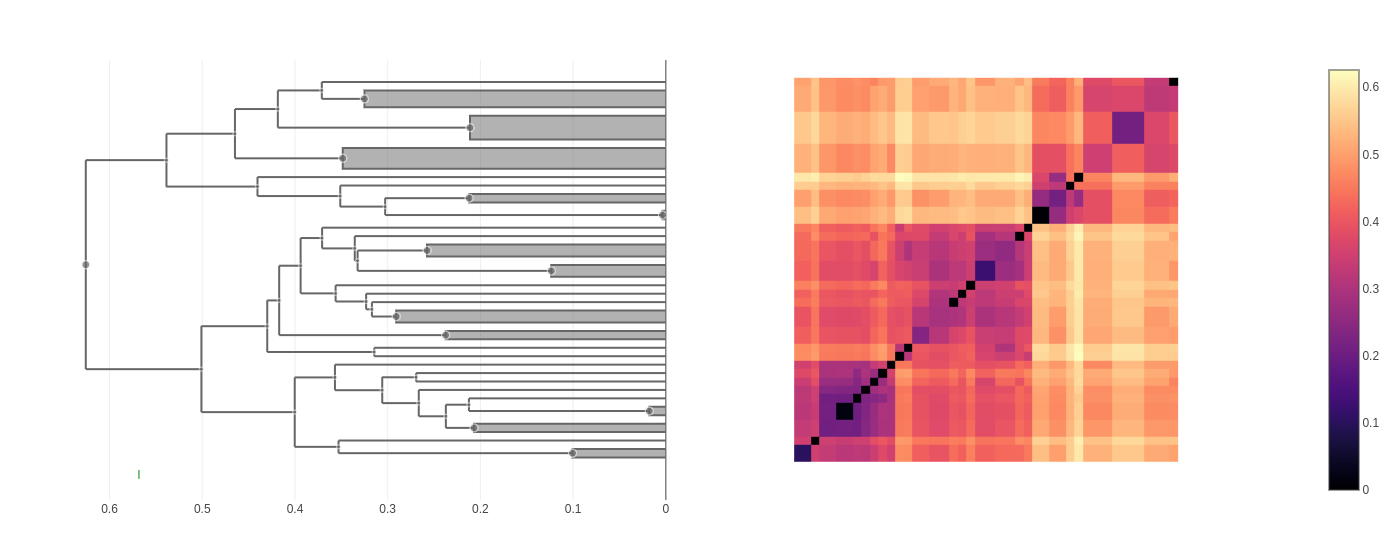

In [25]:
plot(clustermap(apply_edits(edits), "cereus subgroup 2"))

In [26]:
set_threshold!(edits, "cereus subgroup 2", .55)

0.55

## Finish

In [27]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Float64?,String?
1,3,mycoides,12,0.952147,1,7,,missing,missing
2,4,thuringiensis,19,0.683279,0,3,,0.5,0.6652
3,5,cereus subgroup 1,80,0.739589,0,22,,0.6,0.7009
4,6,cereus subgroup 2,71,0.691876,0,13,,0.55,0.6256
